Let's Investigate P4K scores

Setup and Data Preparation

In [1]:
# %matplotlib inline

#Display all outputs from cells
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Import Packages

#fs
import os as os

#Data manipulation
import numpy as np
import pandas as pd

#Plotting
import plotnine as p9
import matplotlib.pyplot as plt

#iteration
import itertools as it

#Wordclouds
from wordcloud import WordCloud
import wordcloud

#Combinatorics
import collections

#regex
import re

#NLTK
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

#remove non-alpha numeric text from str
def stripNonAlphaNum(text):
    import re
    return re.compile(r'\W+', re.UNICODE).split(text)


#Import data
df_p4k = pd.read_csv(filepath_or_buffer = "./data/p4kreviews.csv",
                     encoding = "ansi")

#Remove the row count
df_p4k.drop(columns=df_p4k.columns[0],
            inplace= True)

#Convert genre to categorical
df_p4k['genre'] = df_p4k['genre'].astype('category')

C:\Users\Sam\AppData\Roaming\Python\Python36\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\Sam\AppData\Roaming\Python\Python36\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
#Open console
%qtconsole


Do some simple summary plots

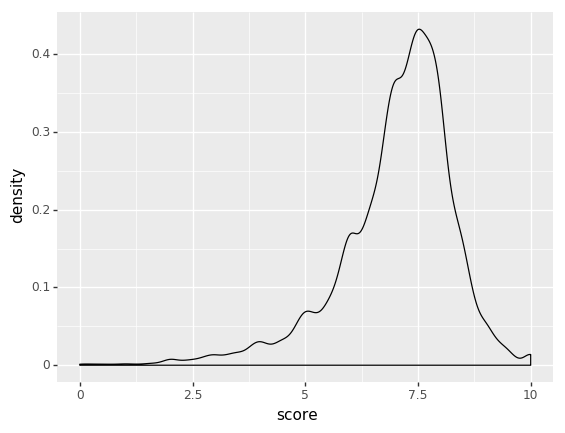

<ggplot: (-9223372014470139497)>

In [2]:
p9.ggplot(data=df_p4k, mapping=p9.aes(x = "score")) + p9.geom_density()

In [6]:
df_p4k_sum = df_p4k.groupby("genre").mean()
df_p4k_sum

,best,score
genre,,
Electronic,0.048010,6.941318
Experimental,0.065333,7.359035
Folk/Country,0.047143,7.219857
Global,0.050562,7.434831
Jazz,0.097276,7.568482
Metal,0.028169,6.980410
None,0.023666,7.020611
Pop/R&B,0.075194,6.948315
Rap,0.055368,6.950304


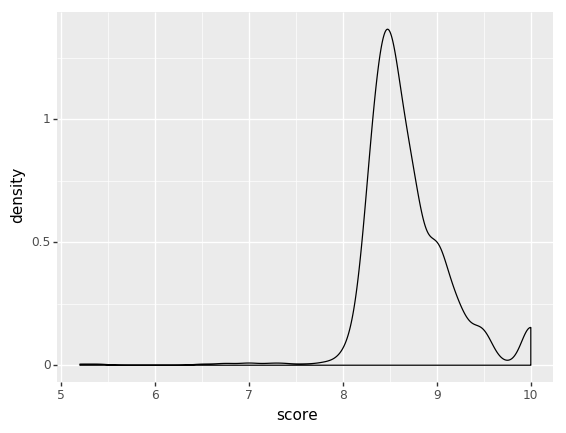

<ggplot: (39909067363)>

In [25]:
df_p4k_best =  df_p4k[df_p4k['best'] == 1]
p9.ggplot(data=df_p4k_best, mapping=p9.aes(x = "score")) + p9.geom_density()

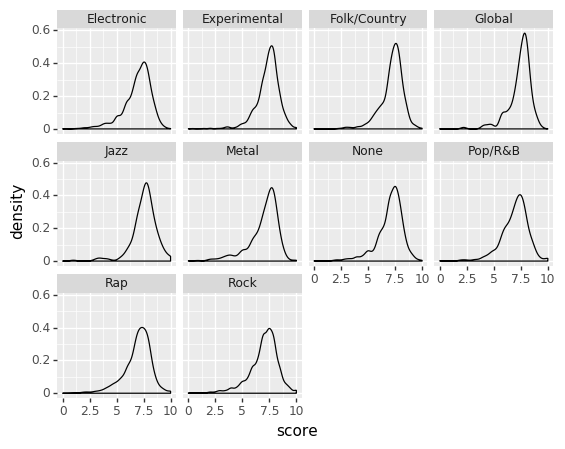

<ggplot: (-9223371996945701765)>

In [26]:
p9.ggplot(data=df_p4k, mapping=p9.aes(x = "score")) + p9.facet_wrap("~genre") + p9.geom_density()

Word Clouds of the review

In [23]:
wc_text = " ".join(df_p4k['review'].head(10).as_matrix().astype('str'))
wc_text = " ".join(stripNonAlphaNum(wc_text))
p4k_wordcloud = WordCloud().generate(wc_text)
wordcloud = WordCloud(max_font_size=40).generate(wc_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")


Split word clouds by genre

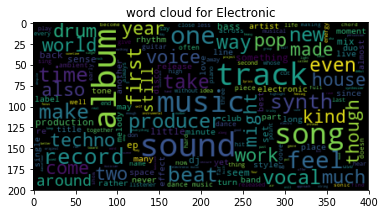

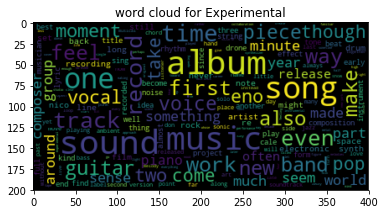

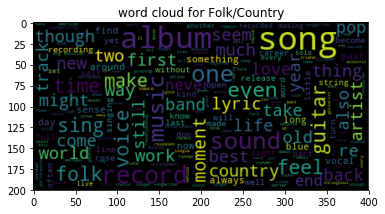

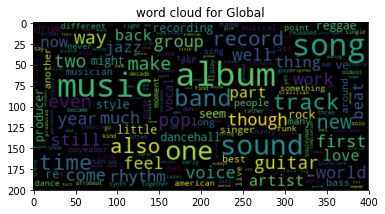

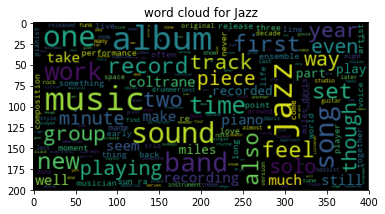

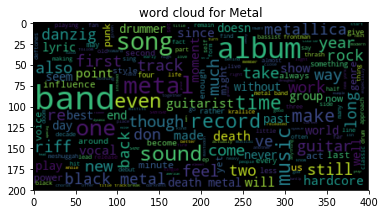

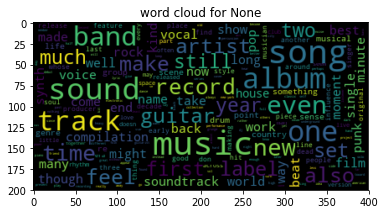

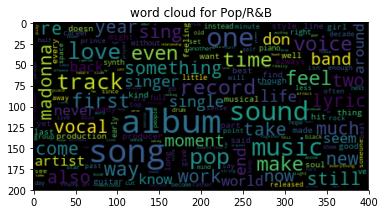

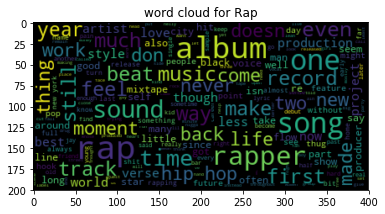

In [8]:
for g in df_p4k['genre'].cat.categories:
    wc_text = " ".join(df_p4k[df_p4k['genre'] == g]['review'].head(100).as_matrix().astype('str')).lower()
    wc_text = " ".join(stripNonAlphaNum(wc_text))
    p4k_wordcloud = WordCloud().generate(wc_text)
    wordcloud = WordCloud(max_font_size=40).generate(wc_text)
    plt.figure()
    plt.title("word cloud for " + g)
    plt.imshow(wordcloud, interpolation="bilinear")

Remove the most common words

In [3]:
#Most common words

#Find the most common words
wc_text = " ".join(df_p4k['review'].head(100).as_matrix().astype('str')).lower()
top_words = stripNonAlphaNum(wc_text)
top_words = collections.Counter(top_words)

#Use this to create regex filter
word_filter = top_words.most_common(100)
word_filter = [x[0] for x in word_filter]
word_filter = "|".join(word_filter)

regex = re.compile(word_filter)

#Filter out the matching words and recreate a huge string
wc_text = filter(lambda x: not regex.match(x), wc_text.split())
wc_text = " ".join(wc_text)

p4k_wordcloud = WordCloud().generate(wc_text)
wordcloud = WordCloud(max_font_size=40).generate(wc_text)
plt.figure()
plt.title("word cloud (with common words removed)")
plt.imshow(wordcloud, interpolation="bilinear")

Split by genre (with common words removed)

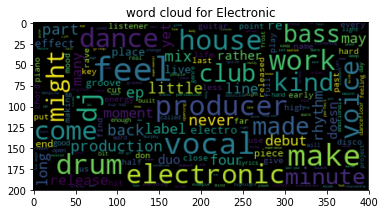

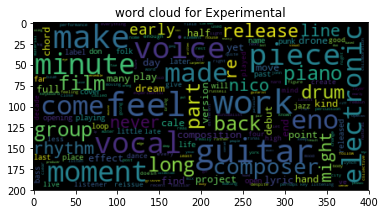

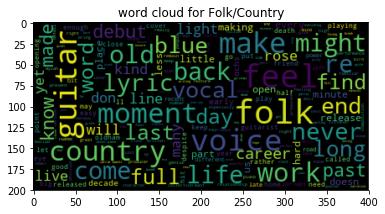

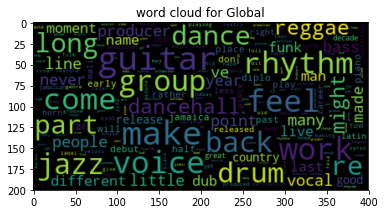

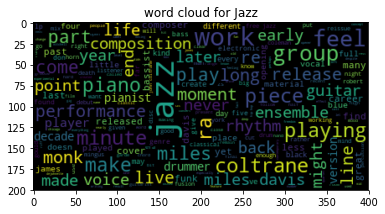

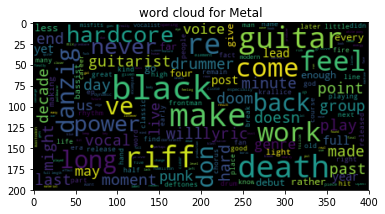

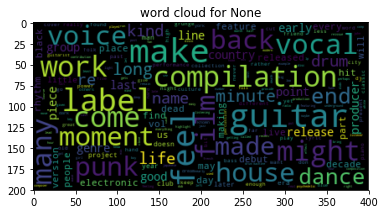

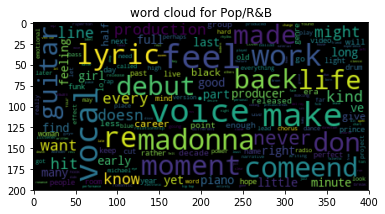

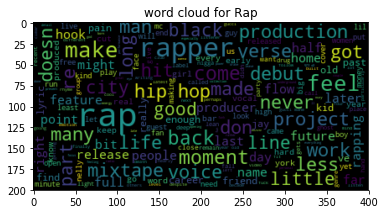

In [15]:

for g in df_p4k['genre'].cat.categories:
    wc_text = " ".join(df_p4k[df_p4k['genre'] == g]['review'].head(100).as_matrix().astype('str')).lower()
    wc_text = " ".join(stripNonAlphaNum(wc_text))
    wc_text = filter(lambda x: not regex.match(x), wc_text.split())
    wc_text = " ".join(wc_text)
    p4k_wordcloud = WordCloud().generate(wc_text)
    wordcloud = WordCloud(max_font_size=40).generate(wc_text)
    plt.figure()
    plt.title("word cloud for " + g)
    plt.imshow(wordcloud, interpolation="bilinear")

There is still significant overlap, let's compute the differences between genres.

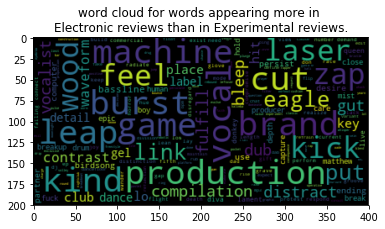

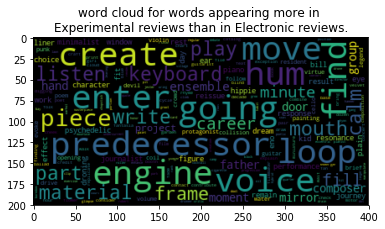

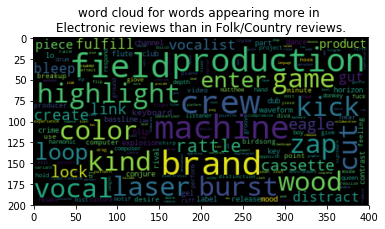

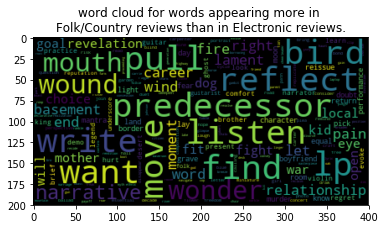

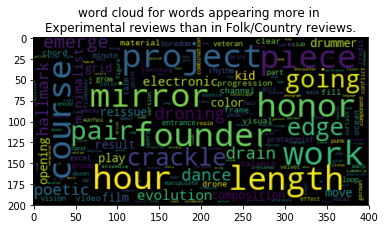

In [7]:
#Compute differences between word clouds

#Just pick a few categories so jupyter doesn't cry about too many plots
for g in it.combinations(df_p4k['genre'].cat.categories[0:3], 2):
    
    if g[0] == g[1]:
        continue
    
    #Create genre 1 word count
    wc_text = " ".join(df_p4k[df_p4k['genre'] == g[0]]['review'].head(100).as_matrix().astype('str')).lower()
    top_words = stripNonAlphaNum(wc_text)
    top_words = filter(lambda x: not regex.match(x), top_words)
    top_words = collections.Counter(top_words)
    
    df_top_words = pd.DataFrame(list(top_words.items()),
                                columns = ['name', 'count1'])
    
    #Create genre 2 word count
    wc_text = " ".join(df_p4k[df_p4k['genre'] == g[1]]['review'].head(100).as_matrix().astype('str')).lower()
    top_words2 = stripNonAlphaNum(wc_text)
    top_words2 = filter(lambda x: not regex.match(x), top_words2)
    top_words2 = collections.Counter(top_words2)
    
    df_top_words2 = pd.DataFrame(list(top_words2.items()),
                                columns = ['name', 'count2'])
    
    #Full join 
    df_compare = df_top_words.merge(df_top_words2,
                                    how = "outer",
                                    on = "name")
    df_compare['count1'] = df_compare['count1'].fillna(0)
    df_compare['count2'] = df_compare['count2'].fillna(0)
    
    df_compare['diff1'] = df_compare['count1'] - df_compare['count2']
    df_compare['diff2'] = df_compare['count2'] - df_compare['count1']
    
    genre1_text = " ".join(df_compare[df_compare['diff1'] > 0]['name'])
    genre2_text = " ".join(df_compare[df_compare['diff2'] > 0]['name'])
    
    WordCloud().generate(genre1_text)
    wordcloud = WordCloud(max_font_size=40).generate(genre1_text)
    plt.figure()
    plt.title("word cloud for words appearing more in \n" + g[0] + " reviews than in " + g[1] + " reviews.")
    plt.imshow(wordcloud, interpolation="bilinear")
    
    WordCloud().generate(genre2_text)
    wordcloud = WordCloud(max_font_size=40).generate(genre2_text)
    plt.figure()
    plt.title("word cloud for words appearing more in \n" + g[1] + " reviews than in " + g[0] + " reviews.")
    plt.imshow(wordcloud, interpolation="bilinear")

Let's try a different kind of visualisation

In [13]:
df_plot_data = pd.DataFrame([],
                            columns=[''])

for g in it.combinations(df_p4k['genre'].cat.categories, 2):
    
    if g[0] == g[1]:
        continue
    
    #Create genre 1 word count
    wc_text = " ".join(df_p4k[df_p4k['genre'] == g[0]]['review'].head(100).as_matrix().astype('str')).lower()
    top_words = stripNonAlphaNum(wc_text)
    top_words = filter(lambda x: not regex.match(x), top_words)
    top_words = collections.Counter(top_words)
    
    df_top_words = pd.DataFrame(list(top_words.items()),
                                columns = ['name', 'count1'])
    
    #Create genre 2 word count
    wc_text = " ".join(df_p4k[df_p4k['genre'] == g[1]]['review'].head(100).as_matrix().astype('str')).lower()
    top_words2 = stripNonAlphaNum(wc_text)
    top_words2 = filter(lambda x: not regex.match(x), top_words2)
    top_words2 = collections.Counter(top_words2)
    
    df_top_words2 = pd.DataFrame(list(top_words2.items()),
                                columns = ['name', 'count2'])
    
    #Full join 
    df_compare = df_top_words.merge(df_top_words2,
                                    how = "outer",
                                    on = "name")
    df_compare['count1'] = df_compare['count1'].fillna(0)
    df_compare['count2'] = df_compare['count2'].fillna(0)
    
    df_compare['genre1'] = g[0]
    df_compare['genre2'] = g[1]
    
    df_compare['diff1'] = df_compare['count1'] - df_compare['count2']
    df_compare['diff2'] = df_compare['count2'] - df_compare['count1']
    
    df_plot_data = df_plot_data.append(df_compare)
    
#Drop empty col
df_plot_data = df_plot_data.drop('', axis = 1)

#Find top 5 positive differences for each genre
df_plot_data2 = df_plot_data.sort_values(by = ["genre1", "genre2", "diff1"], ascending = [True, True, False]).groupby(by = ["genre1", 'genre2']).head(5)
df_plot_data2['name'] = pd.Categorical(df_plot_data2['name'], categories=df_plot_data2['name'].unique())



C:\Users\Sam\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


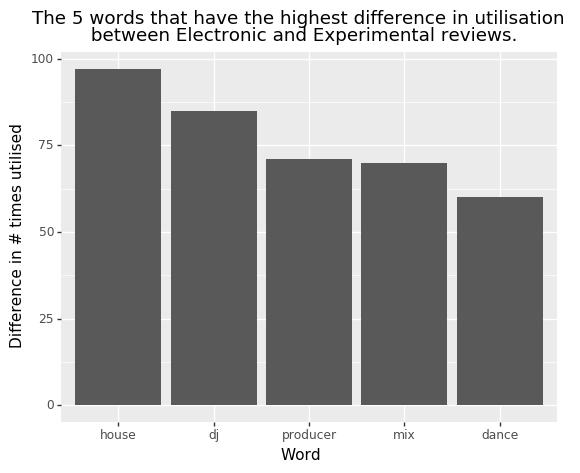

<ggplot: (-9223372027856438023)>


In [15]:

# #Plot the top word differences for each genre
# #Faceting in p9 doesn't seem to work with scales free categorical scales
# (p9.ggplot(data=df_plot_data,
#           mapping=p9.aes(x = "name", y = "diff1")) +
#  p9.facet_wrap(facets = "~ genre1", scales='free_y') + 
#  p9.geom_col())

#Instead we can just plot each genre combination
for i in df_plot_data2[['genre1', 'genre2']].drop_duplicates().head(1).itertuples():
    # (df_plot_data['genre1'] == i[1]) and (df_plot_data['genre1'] == i[2])
    tmp_df = df_plot_data2.loc[lambda df: (df['genre1'] == i[1]) & (df['genre2'] == i[2])]
    
    tmp_df['name'] = pd.Categorical(tmp_df['name'], categories = tmp_df['name'].unique())
    tmp_df = tmp_df.sort_values(by = ["genre1", "genre2", "diff1"], ascending = [True, True, False]).groupby(by = ["genre1", 'genre2']).head(5)
    
    # print(tmp_df)
    # 
    print(p9.ggplot(data = tmp_df) +
    p9.geom_col(p9.aes(x = 'name', y = 'diff1')) +
          p9.labs(title = 'The 5 words that have the highest difference in utilisation \n between ' + i[1] + ' and ' + i[2] + ' reviews.',
                  x = "Word",
                  y = "Difference in # times utilised"))


That was not very good. We tend to get the same words for each genre. Instead we could take the top difference for each word.

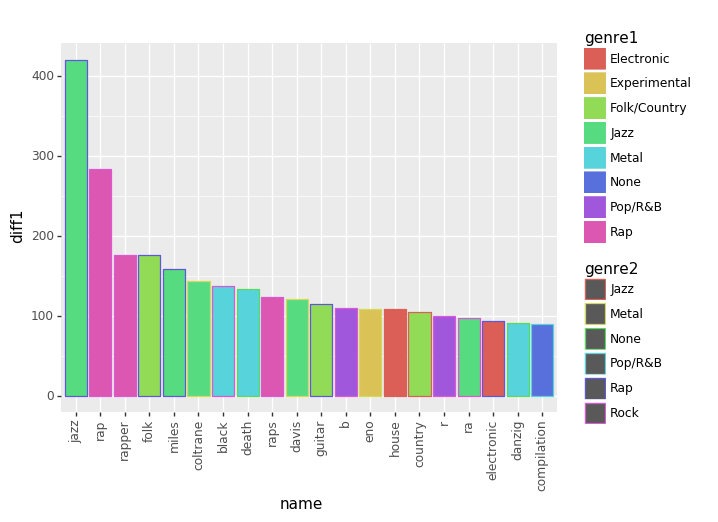

<ggplot: (8999685419)>

In [24]:
tmp_plot_data = df_plot_data.sort_values(by = ['name', 'diff1'], ascending= [True, False]).groupby('name').head(1).sort_values('diff1', ascending=False).head(20)
tmp_plot_data['name'] = pd.Categorical(tmp_plot_data['name'], categories=tmp_plot_data['name'].unique())

(p9.ggplot(data = tmp_plot_data) +
 p9.geom_col(p9.aes(x = "name",
                 y = "diff1",
                 fill = 'genre1',
                colour = 'genre2'))+
 p9.theme(axis_text_x = p9.element_text(rotation=90)))

That is still pretty shitty. How about a genre x genre grid with geom_tile representing the biggest difference between each genre

In [42]:
# tmp_plot_data = df_plot_data.sort_values('diff1', ascending=False).groupby(['genre1', 'genre2']).head(1).sort_values(['genre1', 'genre2'], ascending=False)
tmp_plot_data = df_plot_data.sort_values('diff1', ascending=False).groupby('name').head(1).groupby(['genre1', 'genre2']).head(1).sort_values(['genre1', 'genre2'], ascending=False)

tmp_plot_data['genre1'] = pd.Categorical(tmp_plot_data['genre1'], categories= tmp_plot_data['genre1'].unique())
tmp_plot_data['genre2'] = pd.Categorical(tmp_plot_data['genre2'], categories= tmp_plot_data['genre1'].unique())
#Careful, if you have NaN category values these will get plotted at the first level of the category.
tmp_plot_data = tmp_plot_data[tmp_plot_data['genre1'].notnull()]
tmp_plot_data = tmp_plot_data[tmp_plot_data['genre2'].notnull()]

#Can mirror it, but I think it's clearer without the mirror
# tmp_plot_data2 = pd.DataFrame.copy(tmp_plot_data)
# # tmp_plot_data2 = tmp_plot_data2[tmp_plot_data2['genre2'] != 'Electronic']
# # tmp_plot_data2 = tmp_plot_data2[tmp_plot_data2['genre1'] != 'Electronic']
# tmp_plot_data2['tmp_genre'] = tmp_plot_data2['genre1']
# tmp_plot_data2['genre1'] = tmp_plot_data2['genre2']
# tmp_plot_data2['genre2'] = tmp_plot_data2['tmp_genre']
# tmp_plot_data2['diff1'] = abs(tmp_plot_data2['diff2'])
# tmp_plot_data2 = tmp_plot_data2.drop("tmp_genre", axis = 1)
# tmp_plot_data2 = tmp_plot_data2[tmp_plot_data2['genre1'].notnull()]
# tmp_plot_data2 = tmp_plot_data2[tmp_plot_data2['genre2'].notnull()]
# 
# 
# tmp_plot_data = tmp_plot_data.append(tmp_plot_data2)

(p9.ggplot(data = tmp_plot_data) + 
p9.geom_text(p9.aes(x = "genre2",
                     y = 'genre1',
                     label = 'name',
                     color = 'diff1'))+
 p9.labs(title = 'largest differences in word frequency between genres 1 & 2 \n note: each word can only appear once'))

Look at how sentiment score of the review correlates to actual score

In [41]:
df_review_sent_agg = pd.DataFrame()

analyzer = SentimentIntensityAnalyzer()

uninteretable_reviews = int(0)

#Look out there is a missing review
# df_p4k.iloc[13300]

#Look out there is a garbage review
# df_p4k.iloc[17166]

for index, row in df_p4k.iterrows():
    
    #Skip missing rows / where the review is not a string
    if not isinstance(row['review'], str):
        uninteretable_reviews += 1
        continue
    
    
    token = sent_tokenize(row['review'])
    scores = list([["compound",
                  "neg",
                  "neu",
                  "pos",
                   "album",
                   "artist"]])
    
    #Skip reviews where no sentences can be tokenized from the review str
    if len(token) == 0:
        uninteretable_reviews += 1
        continue
    
    for j in token:
        #Create sentiment score
        score = analyzer.polarity_scores(j)
        
        #Return list of dict values sorted by key (same order as above)
        score = sorted(list(score.items()), key = lambda x: x[1])
        score = [y[1] for y in score]
        
        #Add static columns of album/artist
        score = list(score) + [row['album'], row['artist']]
        scores.append(score)
    
    #Create data frame of scores and summarise the mean sentiment
    df_sents = pd.DataFrame(scores, columns = scores.pop(0))
    df_sents = df_sents.groupby(['album', 'artist']).aggregate(np.mean)
    #Need to reset index after grouped operation. This is like having to ungroup() in dplyr syntax
    df_sents = df_sents.reset_index()
    
    #If you don't ungroup previously the grouped columns they will appear in the DF but not in its columns attribute
    df_review_sent_agg = df_review_sent_agg.append(df_sents)
    
#Print the number of missing/unusable reviews
if uninteretable_reviews > 0:
    print(str(uninteretable_reviews) + ' reviews could not be parsed.')
    
#Join back the other fields
df_review_sent_agg = df_review_sent_agg.merge(right = df_p4k, 
                                              how = 'inner',
                                              on = ['album', 'artist'])

2 reviews could not be parsed.


In [42]:
#Check the results
df_review_sent_agg

,album,artist,compound,neg,neu,pos,best,date,genre,review,score
0,A.M./Being There,Wilco,-0.050746,0.115656,0.296064,0.855172,1,December 6 2017,Rock,Best new reissue 1 / 2 Albums Newly reissued a...,7.0
1,No Shame,Hopsin,-0.444050,0.026775,0.207538,0.783025,0,December 6 2017,Rap,"On his corrosive fifth album, the rapper takes...",3.5
2,Material Control,Glassjaw,-0.129715,0.097647,0.290047,0.833074,0,December 6 2017,Rock,"On their first album in 15 years, the Long Isl...",6.6
3,Weighing of the Heart,Nabihah Iqbal,-0.047278,0.133481,0.414026,0.861356,0,December 6 2017,Pop/R&B,"On her debut LP, British producer Nabihah Iqba...",7.7
4,The Visitor,Neil Young / Promise of the Real,-0.030500,0.129125,0.357112,0.869421,0,December 5 2017,Rock,"While still pointedly political, Neil Young’s ...",6.7
5,Perfect Angel,Minnie Riperton,-0.016019,0.137928,0.396087,0.877600,1,December 5 2017,Pop/R&B,Best new reissue A deluxe reissue of Minnie Ri...,9.0
6,Everyday Is Christmas,Sia,-0.009850,0.142846,0.323288,0.810715,0,December 5 2017,Pop/R&B,Sia’s shiny Christmas album feels inconsistent...,5.8
7,Zaytown Sorority Class of 2017,Zaytoven,-0.037985,0.093118,0.278126,0.876026,0,December 5 2017,Rap,The prolific Atlanta producer enlists 17 women...,6.2
8,Songs of Experience,U2,-0.117296,0.084046,0.251987,0.861180,0,December 4 2017,Rock,"Years in the making, U2’s 14th studio album fi...",5.3
9,Post Self,Godflesh,-0.232658,0.083750,0.255554,0.816196,0,December 4 2017,Metal,The new LP from pioneering industrial band God...,8.1


Now let's try and model the review score on the aggregated sentiment score (and genre I guess)

In [55]:
#Does this look like this is going to work well
df_review_sent_agg.sort_values('pos', ascending= False).head(5)

df_review_sent_agg.sort_values('neg', ascending= False).head(5)

df_review_sent_agg.sort_values('neu', ascending= False).head(5)

df_review_sent_agg.sort_values('compound', ascending= False).head(5)

#Probably not. Goddamn hipster reviews.

,album,artist,compound,neg,neu,pos,best,date,genre,review,score
17185,A Grown-Ass Man,Dump,0.000000,0.000000,0.000000,1.000000,0,June 10 2003,Rock,When you were young you were the king of carro...,5.9
4146,Beware the Fetish,Kasai Allstars,-0.017058,0.028053,0.115289,0.962000,0,July 7 2014,Global,Of all the bands that have contributed to Cram...,7.2
19447,Payin' the Dues,Hellacopters,-0.033324,0.025148,0.055142,0.954000,0,October 19 1999,Electronic,How long are trashy guitar bands going to be a...,6.0
12729,Listening to Donald Judd,Stephen Vitiello,-0.088693,0.016214,0.065221,0.953357,0,April 20 2007,Rock,"A sound-artist travels to Marfa, Texas, where ...",6.8
8408,"Strumming Music for Piano, Harpsichord and Str...",Charlemagne Palestine,-0.051183,0.035583,0.130888,0.952167,0,November 30 2010,Experimental,This 3xCD set features a trio of 1970s composi...,7.3


,album,artist,compound,neg,neu,pos,best,date,genre,review,score
15594,Not So Much to Be Loved as to Love,Jonathan Richman,0.009973,0.252682,0.564977,0.815418,0,November 18 2004,Rock,"Another set of doe-eyed, goofily innocent song...",8.1
10369,Telekinesis!,Telekinesis,0.017778,0.230389,0.570667,0.813422,0,April 8 2009,Rock,"This power-pop debut echoes the Shins, Fountai...",6.3
19160,Time Capsule: The Best of...,Matthew Sweet,-0.046133,0.226611,0.516544,0.791139,0,September 26 2000,Rock,"""You can't see how I matter in this world,"" si...",7.2
4234,Where We Come From,Popcaan,-0.013561,0.223889,0.541517,0.821572,0,June 10 2014,Global,Popcaan is the current leader in the neverendi...,8.0
201,I Love You Like a Brother,Alex Lahey,0.021765,0.219565,0.510791,0.823074,0,October 9 2017,Rock,"On her giddy rush of a debut, Australia’s Alex...",7.6


,album,artist,compound,neg,neu,pos,best,date,genre,review,score
7139,CYRK,Cate Le Bon,0.030083,0.165083,0.606150,0.858492,0,January 18 2012,Folk/Country,"The cool, disaffected Welsh avant-pop chanteus...",7.6
3930,This Is My Hand,My Brightest Diamond,-0.025957,0.180286,0.581821,0.834500,0,September 15 2014,Rock,Self-produced by My Brightest Diamond's Shara ...,7.0
4422,Ghetto Cuisine,DaVinci / Sweet Valley,-0.009927,0.178867,0.578240,0.793087,0,April 17 2014,Rap,It's not always easy for musicians to hop betw...,7.1
7918,La Caverne,Malajube,-0.010242,0.172333,0.571183,0.825600,0,May 6 2011,Rock,Francophone Montreal band continues to fuse ps...,7.0
10369,Telekinesis!,Telekinesis,0.017778,0.230389,0.570667,0.813422,0,April 8 2009,Rock,"This power-pop debut echoes the Shins, Fountai...",6.3


,album,artist,compound,neg,neu,pos,best,date,genre,review,score
8014,EUPHORIC /// HEARTBREAK \\\,Glasvegas,0.055950,0.136786,0.406307,0.804529,0,April 11 2011,Electronic,The heavy-handed skyscraping continues on the ...,4.1
14518,The Last Romance,Arab Strap,0.054117,0.160000,0.397878,0.844972,0,October 18 2005,Rock,"On their sixth album, the Scottish duo's self-...",8.0
17693,Quality,Talib Kweli,0.048120,0.146333,0.385227,0.832360,0,December 10 2002,Rap,When word hit that Talib Kweli had dropped lon...,9.1
4329,White Women,Chromeo,0.044968,0.141737,0.366089,0.816568,0,May 14 2014,Electronic,Chromeo have made it a decade without a widely...,7.6
9681,Strict Joy,The Swell Season,0.042500,0.147800,0.425438,0.859925,0,October 29 2009,Rock,The Oscar-winning duo made famous in the popul...,6.5


In [113]:
#Define split
df_train, df_test, response_train, response_test = train_test_split(df_review_sent_agg,
                                                                    df_review_sent_agg['score'],
                                                                    test_size=0.25,
                                                                    random_state=0)

#select feature columns
df_train = df_train.iloc[:, np.r_[1:5, 7:9]]
df_test = df_test.iloc[:, np.r_[1:5, 7:9]]

#Need to do one hot
lm = LinearRegression()
lm.fit(df_train, response_train)

ValueError: could not convert string to float: 'Pop/R&B'

In [112]:
lm.predict(df_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.